# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("Agg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_ex1_trades_df()
ex2_trades = ta.get_ex2_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(8, 8)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                  912
           取引回数                    8
           開始日時  2021-04-15 16:22:45
           終了日時  2021-04-15 16:38:37
        取引時間[H]              0:15:52
      取引単位[BTC]               0.0007
  利確しきい値[JPY]                 5000
損切りマージン[JPY]                 5000
-------------------  -------------------


トレード結果
-----------  ------
開始[JPY]     12880
終了[JPY]     12845
利益[JPY]       -35
開始[BTC]    0.0024
終了[BTC]    0.0024
利益[BTC]         0
開始[TOTAL]   29388
終了[TOTAL]   29323
利益[TOTAL]     -65
-----------  ------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
      -65         -36.024     -28.976


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2021-04-15 16:23:53,sell,4805.500,buy,4804.349,1.151
2021-04-15 16:24:09,buy,4802.143,sell,4803.344,1.201
2021-04-15 16:24:12,buy,4802.143,sell,4804.532,2.389
2021-04-15 16:24:28,sell,4802.151,buy,4801.931,0.220
2021-04-15 16:25:52,buy,4800.390,sell,4805.113,4.723
2021-04-15 16:29:27,sell,4814.253,buy,4816.044,-1.791
2021-04-15 16:36:54,buy,4802.001,sell,4806.386,4.385
2021-04-15 16:38:28,sell,4806.060,buy,4806.857,-0.797


In [12]:
round(sum(profit_df.profit), 3)

11.481

## トレードグラフ

In [13]:
ex1_ticks = ta.get_ex1_ticks_df()
ex2_ticks = ta.get_ex2_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(912, 912)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1.0, 'exchange2 bid/exchange1 ask')

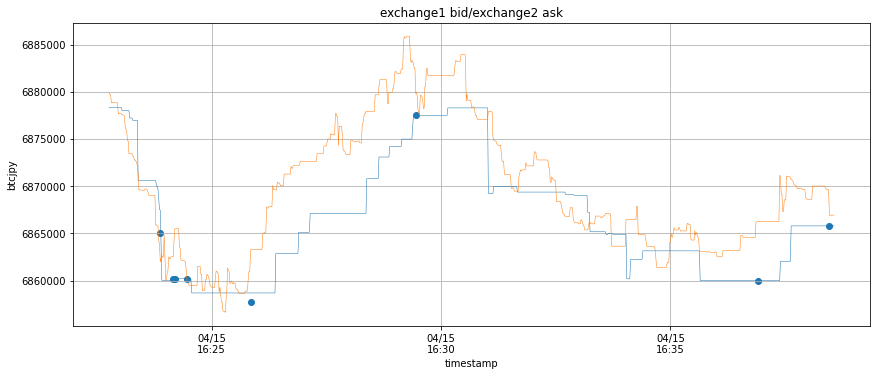

In [16]:
fig1

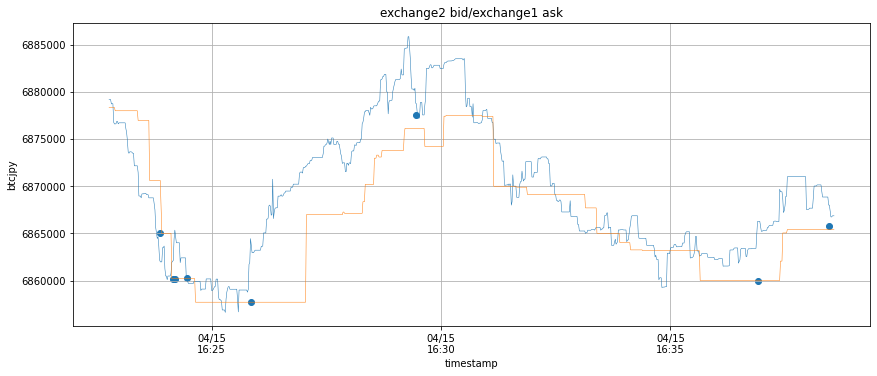

In [17]:
fig2